In [28]:
import librosa
import librosa.display
import os

import warnings
warnings.filterwarnings("ignore")

path_to_db_voice = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\voice\\"
path_to_db_plane = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\plane\\"
path_to_db_both = "D:\\Utilisateurs\\ENAC\\projet_AIRBUS\\db\\both\\"

l_voice_records = os.listdir(path_to_db_voice)
l_airplane_records = os.listdir(path_to_db_plane)
l_both_records = os.listdir(path_to_db_both)

In [29]:
import random as rd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
n_train = 12

sp_voice_train = [] #spectres 
sp_plane_train = []
sp_both_train = []
pca = PCA(0.99)
pca_xtrain = None

for i in range(n_train): 
    picked = rd.choice(l_voice_records) 
    signal,sample_rate = librosa.load(path_to_db_voice+picked)
    spectrum = librosa.stft(y=signal,center=False) 
    spectrum = spectrum.astype(float)
    sp_voice_train.append(np.transpose(spectrum))


    picked = rd.choice(l_airplane_records) 
    signal,sample_rate = librosa.load(path_to_db_plane+picked)
    spectrum = librosa.stft(y=signal,center=False)

    spectrum = spectrum.astype(float)
    sp_plane_train.append(np.transpose(spectrum))

    picked = rd.choice(l_both_records) 
    signal,sample_rate = librosa.load(path_to_db_both+picked)
    spectrum = librosa.stft(y=signal,center=False)

    spectrum = spectrum.astype(float)
    sp_both_train.append(np.transpose(spectrum))

n_test = 5
sp_voice_test = [] #spectres 
sp_plane_test = []
sp_both_test = []

for i in range(n_test): 
    
    picked = rd.choice(l_voice_records) 
    signal,sample_rate = librosa.load(path_to_db_voice+picked)
    spectrum = librosa.stft(y=signal,center=False) 
    spectrum = spectrum.astype(float)
    sp_voice_test.append(np.transpose(spectrum))


    picked = rd.choice(l_airplane_records) 
    signal,sample_rate = librosa.load(path_to_db_plane+picked)
    spectrum = librosa.stft(y=signal,center=False)
    spectrum = spectrum.astype(float)
    sp_plane_test.append(np.transpose(spectrum))

    picked = rd.choice(l_both_records) 
    signal,sample_rate = librosa.load(path_to_db_both+picked)
    spectrum = librosa.stft(y=signal,center=False)
    spectrum = spectrum.astype(float)
    sp_both_test.append(np.transpose(spectrum))





In [30]:
X_voice= np.concatenate(sp_voice_train)
X_plane = np.concatenate(sp_plane_train)
X_both = np.concatenate(sp_both_train)

X_voice_test= np.concatenate(sp_voice_test)
X_plane_test = np.concatenate(sp_plane_test)
X_both_test = np.concatenate(sp_both_test)

In [31]:
len(X_plane_test)+len(X_both_test)

5280

In [32]:
# len(sp_plane_train)

# for i in range(n_train):
#     sp_voice_train[i] = pca.transform(sp_voice_train[i])
#     sp_plane_train[i] = pca.transform(sp_plane_train[i])

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y_voice = ['Voice' if max(elt)>1 else -1 for elt in X_voice]
y_plane = ['Plane' if max(elt)>1 else -1 for elt in X_plane]
y_both = ['Voice' if max(elt)>1 else -1 for elt in X_both]

y_voice_test = ['Voice' if max(elt)>1 else -1 for elt in X_voice_test]
y_plane_test = ['Plane' if max(elt)>1 else -1 for elt in X_plane_test]
y_both_test = ['Voice' if max(elt)>1 else -1 for elt in X_both_test]

# y_voice = [1 for elt in X_voice]
# y_plane = [0 for elt in X_plane]
# y_both = [1 for elt in X_both]

# y_voice_test = [1 for elt in X_voice_test]
# y_plane_test = [0 for elt in X_plane_test]
# y_both_test = [1  for elt in X_both_test]

X = np.concatenate([X_voice,X_plane,X_both])
# X_test = np.concatenate([X_voice_test,X_plane_test,X_both_test])
X_test = np.concatenate([X_plane_test,X_both_test])
# X_test = X_both_test
# X = PCA(0.999).fit_transform(X)
y = y_voice + y_plane + y_both
# y_test = y_voice_test + y_plane_test + y_both_test
# y_test = y_both_test
y_test =y_plane_test + y_both_test
pca = PCA(0.99).fit(X)
X = pca.transform(X)
X_test = pca.transform(X_test)
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X,y)

RandomForestClassifier(n_jobs=-1)

In [34]:
from sklearn.metrics import accuracy_score

pred = rf.predict(X_test)
accuracy_score(pred,y_test)

0.9090909090909091

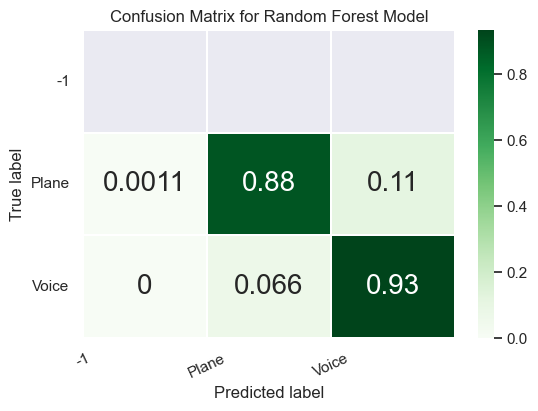

In [35]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pred = rf.predict(X_test)
matrix = confusion_matrix(pred,y_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = rf.classes_
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()